Let's first import the modules and declare some constants.

In [33]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle
from joblib import dump, load

In [34]:
PICTURE_DIR = '../trainingdata/'

Let's also define a function so we can easily view images later.

In [83]:
def show_images(images, titles, cluster):
    num_images = len(images)
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle("CLUSTER " + str(cluster), fontsize=16)
    for i in range(num_images):
        plt.subplot(1,num_images,i+1)
        plt.title(titles[i])
        plt.imshow(images[i])

Now let's load all our pictures. Because there are multiple different combinations of dimensions throughout them, we are also going to resize them to 200x200 for the numpy array that we will actually pass along to sklearn's K-means implementation.

In [36]:
filenames = os.listdir(PICTURE_DIR)
num_images = len(filenames)

original_images = list()
train_images = np.zeros((num_images,200,200,3), dtype=int)

for i in range(num_images):
    original = cv2.imread(PICTURE_DIR + filenames[i])
    resized = cv2.resize(original, (200,200), interpolation=cv2.INTER_NEAREST)
    original_images.append(original)
    train_images[i] = resized

In [37]:
train_images = train_images.reshape(num_images, 200*200*3)

Now let's perform the training. I went through the images and determine there to be roughly 15-20 clusters we could divide these images into, so we'll go ahead and do 17 clusters here. We'll save this fit to a file.

In [73]:
NUM_CLUSTERS = 15
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0).fit(train_images)
dump(kmeans, 'result.joblib')
# TODO: We should also make the images original dimensions a feature and potentially scale its importance by normalizing and doubling its standard deviation.

['result.joblib']

In [74]:
print(kmeans.labels_)

[14  1 12  9  3  8  3  7  1  2  7  4  9  9 13  8  7  3  9  8  8  3  6  6
  7  4  9  0  2  4  4  3  5  5  5  1  8  3  2  9 14  4  9 10  9  9 11  4
  9  3  4 14  5  9  5 13  9 12  9  7  9  2  9  6  7  4  4  3 14  9  9 12
  1  5  7  5  1  9  3  4  7  4  8  3  2  9  1]


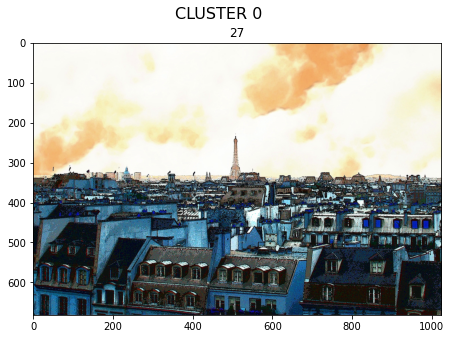

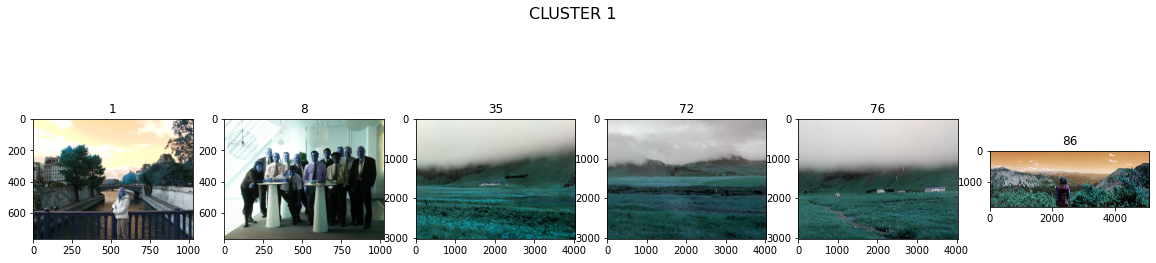

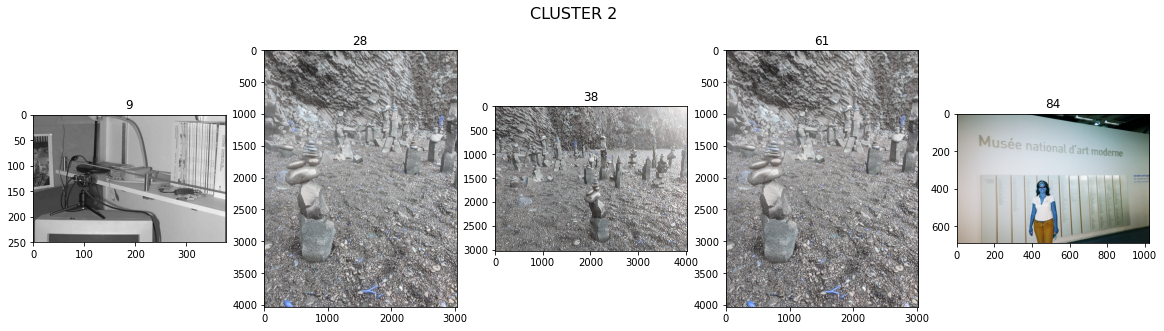

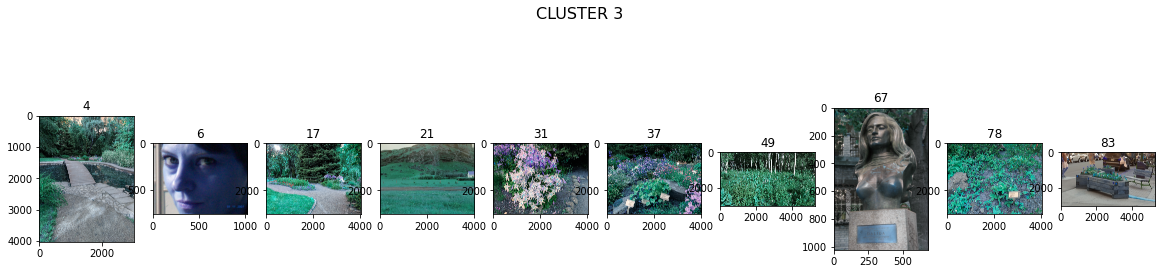

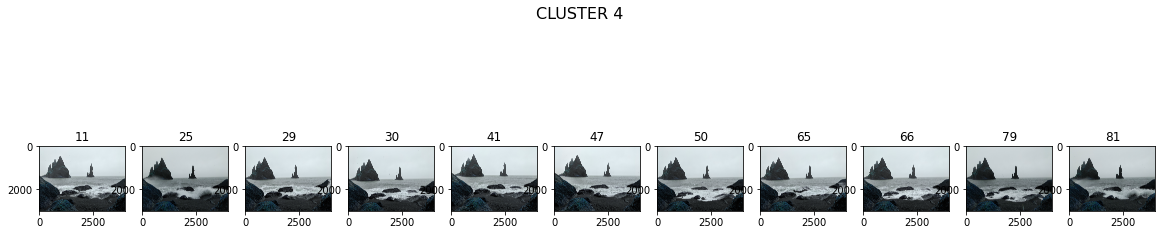

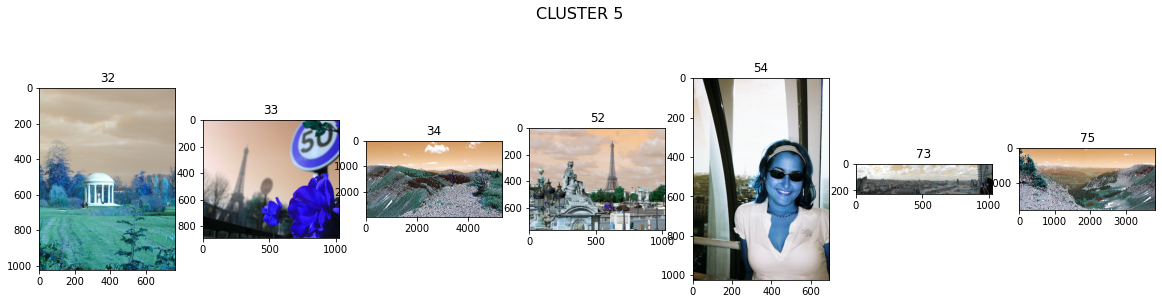

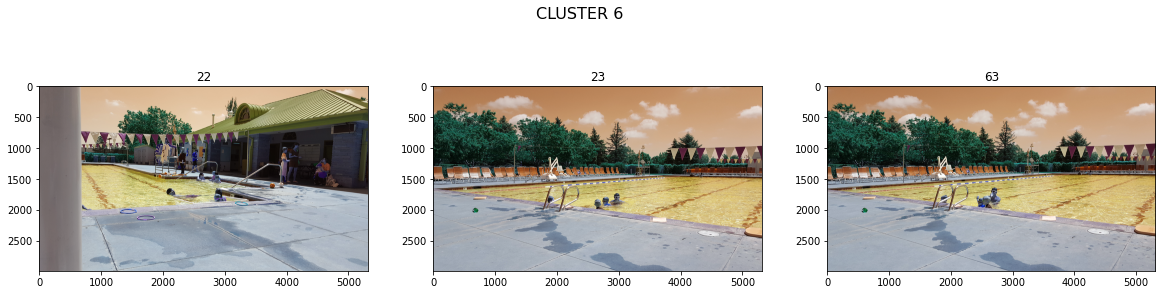

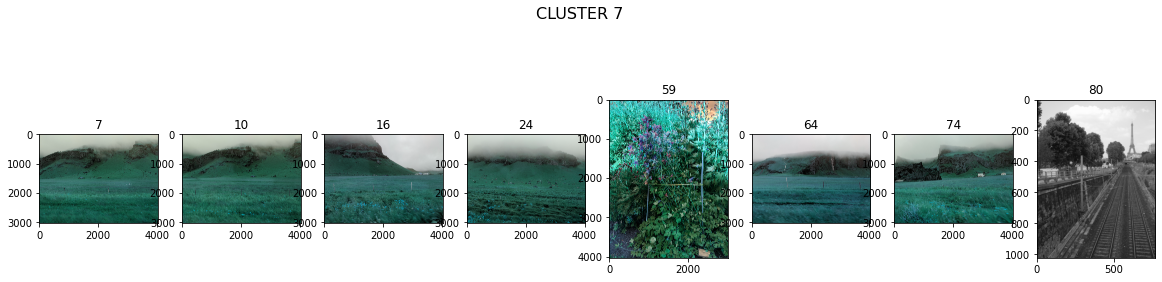

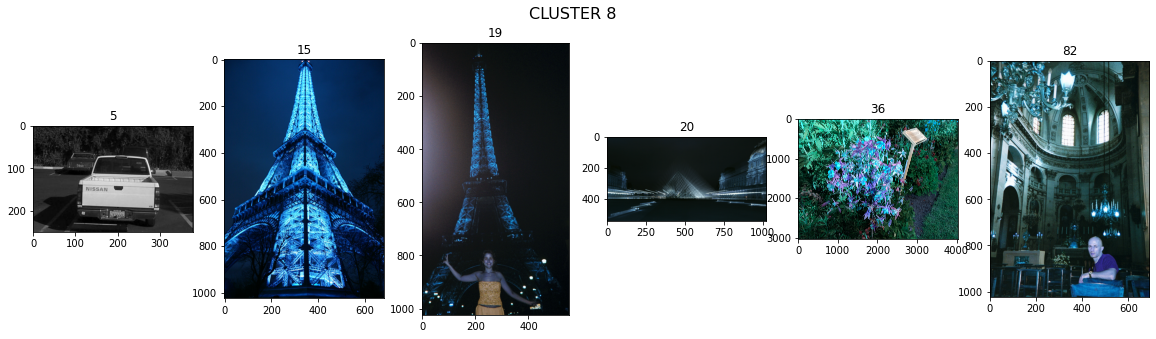

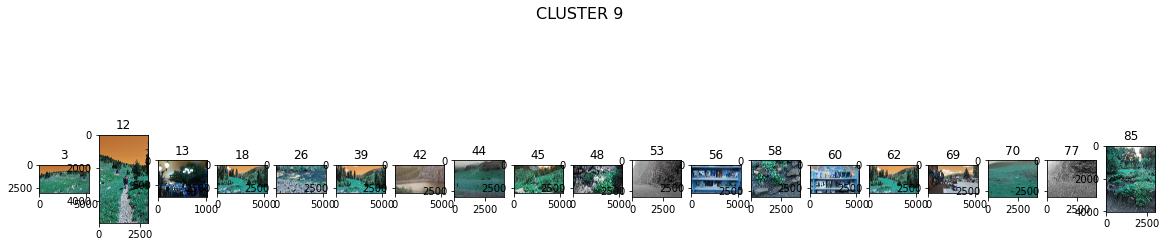

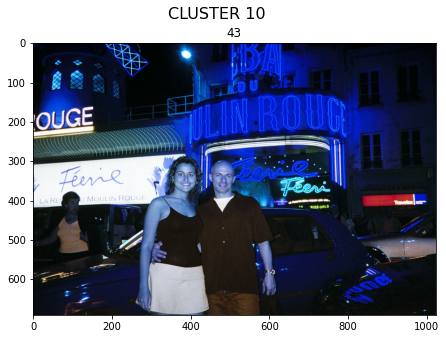

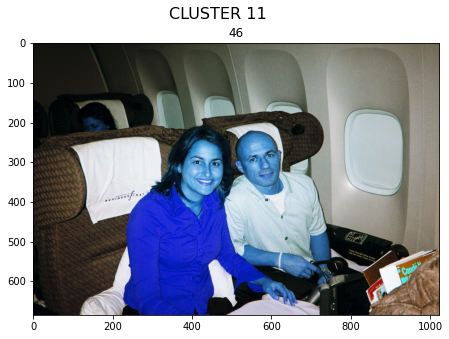

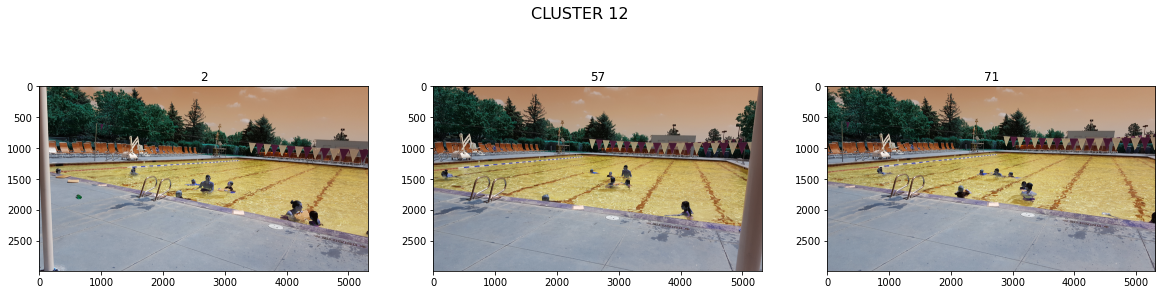

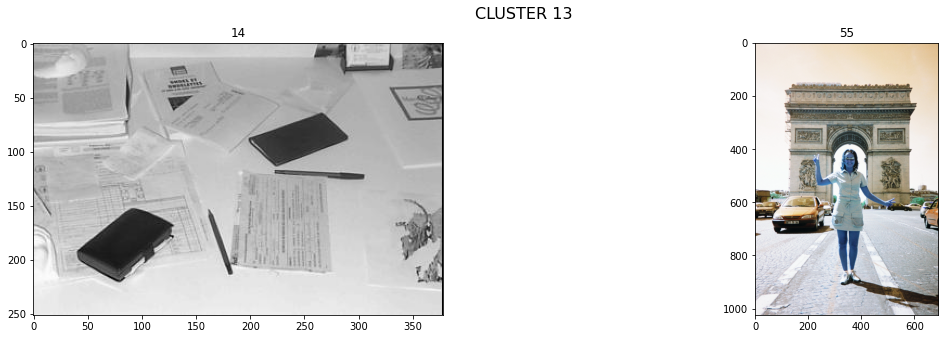

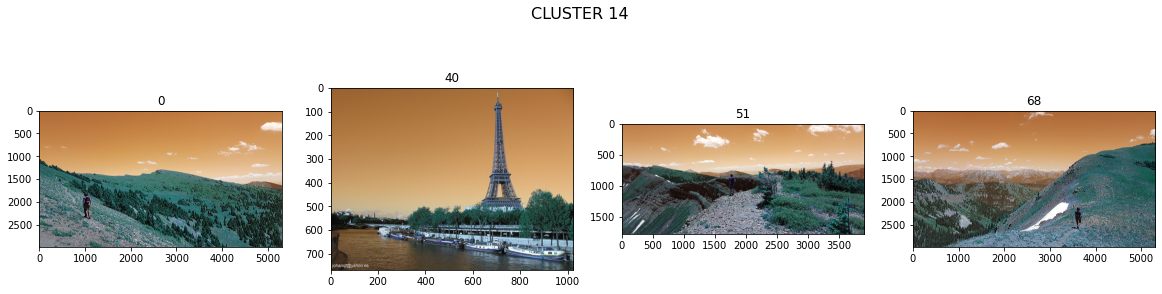

In [84]:
for cluster in range(NUM_CLUSTERS):
    images,titles = list(),list()
    for i in range(num_images):
        if kmeans.labels_[i] == cluster:
            images.append(original_images[i])
            titles.append(str(i))
    show_images(images,titles,cluster)